In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Histogram of Oriented Gradients + Gray-Level Co-occurrence Matrix

In [2]:
features_train_path = '../data/processed/ResNet_HOG_GLCM.npy'
features_test_path = '../data/processed/ResNet_HOG_GLCM_test.npy'
labels_train_path = '../data/processed/labels_train.npy'
labels_test_path = '../data/processed/labels_test.npy'

if os.path.exists(features_train_path):
    X_train = np.load(features_train_path)
else:
    print('No train data input file.')
    exit()

if os.path.exists(features_test_path):
    X_test = np.load(features_test_path)
else:
    print('No test data input file.')
    exit()

if os.path.exists(labels_train_path):
    y_train = np.load(labels_train_path)
else:
    print('No train labels input file.')
    exit()

if os.path.exists(labels_test_path):
    y_test = np.load(labels_test_path)
else:
    print('No test labels input file.')
    exit()

In [3]:
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape) 

(35059, 10153)
(4233, 10153)
(35059,)
(4233,)


In [4]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [5]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7602173399480274


In [6]:
clf.score(X_test, y_test)

0.7602173399480274

In [7]:
print(clf.predict_proba(X_test))

[[0.06 0.26 0.03 0.65]
 [0.08 0.1  0.79 0.03]
 [0.22 0.33 0.41 0.04]
 ...
 [0.04 0.03 0.92 0.01]
 [0.53 0.2  0.25 0.02]
 [0.47 0.28 0.19 0.06]]


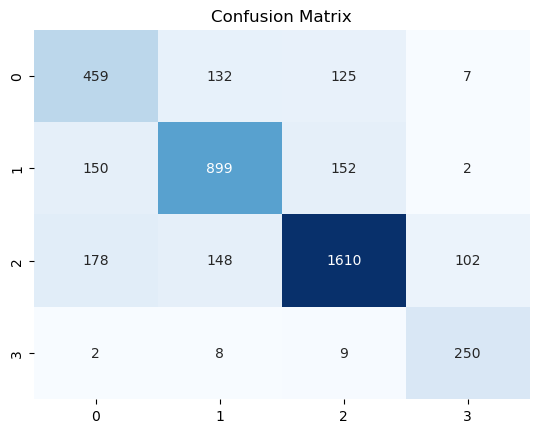

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.title("Confusion Matrix")

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.show()

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.63      0.61       723
           1       0.76      0.75      0.75      1203
           2       0.85      0.79      0.82      2038
           3       0.69      0.93      0.79       269

    accuracy                           0.76      4233
   macro avg       0.72      0.78      0.74      4233
weighted avg       0.77      0.76      0.76      4233



Histogram of Oriented Gradients + VGG

In [6]:
features_train_path = '../data/processed/combined_hog_vgg.npy'
features_test_path = '../data/processed/combined_vgg_hog_test.npy'
labels_train_path = '../data/processed/labels_train.npy'
labels_test_path = '../data/processed/labels_test.npy'

if os.path.exists(features_train_path):
    X_train = np.load(features_train_path)
else:
    print('No train data input file.')
    exit()

if os.path.exists(features_test_path):
    X_test = np.load(features_test_path)
else:
    print('No test data input file.')
    exit()

if os.path.exists(labels_train_path):
    y_train = np.load(labels_train_path)
else:
    print('No train labels input file.')
    exit()

if os.path.exists(labels_test_path):
    y_test = np.load(labels_test_path)
else:
    print('No test labels input file.')
    exit()

In [7]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Score: ', clf.score(X_test, y_test))
print(clf.predict_proba(X_test))

Accuracy: 0.7765178360500827
Score:  0.7765178360500827
[[0.08 0.21 0.04 0.67]
 [0.11 0.19 0.69 0.01]
 [0.48 0.33 0.17 0.02]
 ...
 [0.1  0.23 0.64 0.03]
 [0.41 0.19 0.29 0.11]
 [0.54 0.22 0.22 0.02]]


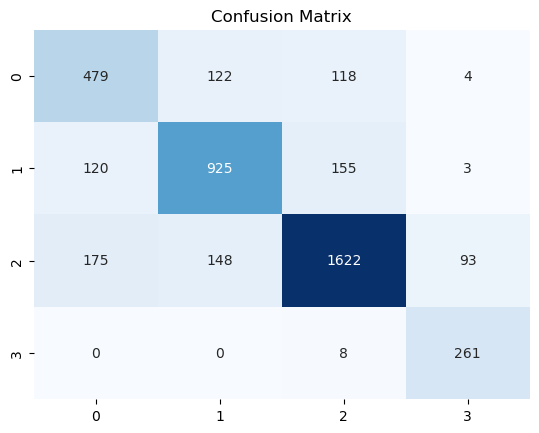

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.title("Confusion Matrix")

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.show()

In [8]:

# {'class_weight': 'balanced', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
clf = RandomForestClassifier(class_weight='balanced', max_depth=50, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=300)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=50,
                       max_features='log2', n_estimators=300)

In [9]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Score: ', clf.score(X_test, y_test))
print(clf.predict_proba(X_test))

Accuracy: 0.7587999055043704
Score:  0.7587999055043704
[[0.12666667 0.26333333 0.07666667 0.53333333]
 [0.11334195 0.14334111 0.68331693 0.06      ]
 [0.34       0.29       0.31333333 0.05666667]
 ...
 [0.06666667 0.11666667 0.79666667 0.02      ]
 [0.4        0.26333333 0.25333333 0.08333333]
 [0.51333333 0.27       0.15333333 0.06333333]]


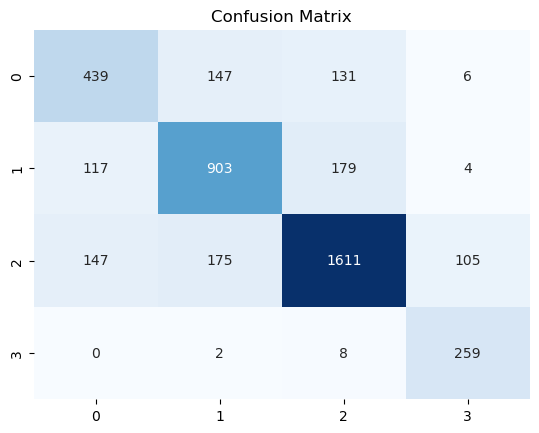

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.title("Confusion Matrix")

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.show()

In [15]:
# Save the model
from joblib import dump, load
dump(clf, '../models/best_rf_model.joblib', compress=('gzip', 9))

['../models/best_rf_model.joblib']

In [13]:
from joblib import load
loaded_model = load('../models/best_rf_model.joblib')
# Verify the loaded model
y_pred_loaded = loaded_model.predict(X_test)
print("Loaded model accuracy:", accuracy_score(y_test, y_pred_loaded))

Loaded model accuracy: 0.7587999055043704


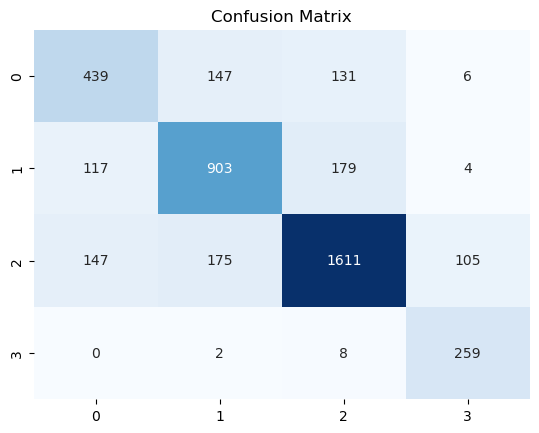

In [18]:
cm = confusion_matrix(y_test, y_pred_loaded)
plt.title("Confusion Matrix")

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.show()

In [17]:
print(classification_report(y_test, y_pred_loaded))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62       723
           1       0.74      0.75      0.74      1203
           2       0.84      0.79      0.81      2038
           3       0.69      0.96      0.81       269

    accuracy                           0.76      4233
   macro avg       0.72      0.78      0.74      4233
weighted avg       0.76      0.76      0.76      4233

